In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# Regresión lineal simple

## Calculo de coeficientes

In [22]:
# Datos simples
x = [1, 2, 3, 4, 5, 5, 5]

# usar y = 1 + 2x + error
y_con_relacion_lineal = [11, 9, 7, 5, 3, 3, 6]
# y = 1 + 2x []

# usar 0 + x**2
y_con_relacion_cuadratica = [1, 4, 9, 16, 25]
#y = -7 + 6x [-1, 5, 11, 17, 23]

def calcular_regresion(x, y):


  # Paso 1: Calcular promedios
  x_mean = sum(x) / len(x)
  y_mean = sum(y) / len(y)

  # Paso 2: Calcular la pendiente (beta_1)
  numerador = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x)))
  denominador = sum((x[i] - x_mean) ** 2 for i in range(len(x)))
  beta_1 = numerador / denominador

  # Paso 3: Calcular la ordenada al origen (beta_0)
  beta_0 = y_mean - beta_1 * x_mean

  print(f"media x= {x_mean}")
  print(f"media y= {y_mean}")
  print(numerador)
  print(denominador)
  print(f"beta 1 = {beta_1}")
  print(f"beta 0 = {beta_0}")


  return beta_0, beta_1

In [23]:
beta_0_l, beta_1_l = calcular_regresion(x, y_con_relacion_lineal)

media x= 3.5714285714285716
media y= 6.285714285714286
-27.142857142857142
15.714285714285715
beta 1 = -1.727272727272727
beta 0 = 12.454545454545453


In [19]:
beta_0_c, beta_1_c = calcular_regresion(x, y_con_relacion_cuadratica)

media x= 3.0
media y= 11.0
60.0
10.0
beta 1 = 6.0
beta 0 = -7.0


Coeficiente beta_1 (pendiente): -1.73
Coeficiente beta_0 (intercepto): 12.45


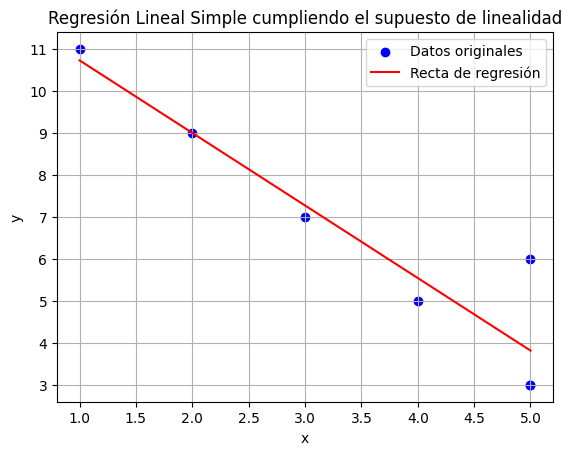

In [24]:
# Mostrar resultados
print(f"Coeficiente beta_1 (pendiente): {beta_1_l:.2f}")
print(f"Coeficiente beta_0 (intercepto): {beta_0_l:.2f}")

# Paso 4 (opcional): Predecir valores
y_pred = [beta_0_l + beta_1_l * xi for xi in x]


plt.scatter(x, y_con_relacion_lineal, color="blue", label="Datos originales")
plt.plot(x, y_pred, color="red", label="Recta de regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal Simple cumpliendo el supuesto de linealidad")
plt.grid(True)
plt.show()

In [21]:
# Paso 1: Calcular promedios
x_mean = sum(x) / len(x)
y_mean = sum(y_con_relacion_lineal) / len(y_con_relacion_lineal)

numerador = sum(((y_pred[i] - y_mean) ** 2) for i in range(len(y_con_relacion_lineal)))
denominador = sum(((y_con_relacion_lineal[i] - y_mean) ** 2) for i in range(len(y_con_relacion_lineal)))
r_cuadrado = numerador / denominador

print(r_cuadrado)

0.9934748733930658


Coeficiente beta_1 (pendiente): 6.00
Coeficiente beta_0 (intercepto): -7.00


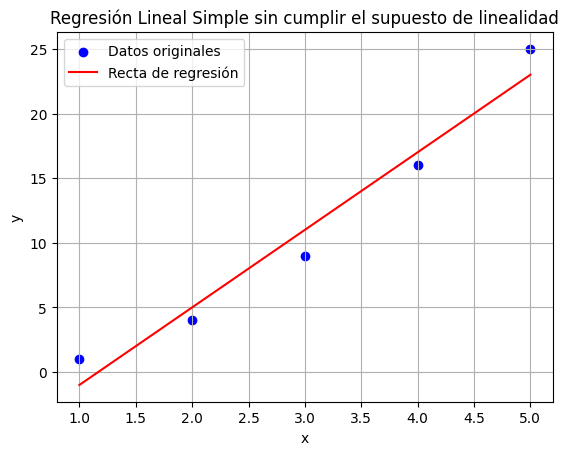

In [ ]:
# Mostrar resultados
print(f"Coeficiente beta_1 (pendiente): {beta_1_c:.2f}")
print(f"Coeficiente beta_0 (intercepto): {beta_0_c:.2f}")

# Paso 4 (opcional): Predecir valores
y_pred = [beta_0_c + beta_1_c * xi for xi in x]



plt.scatter(x, y_con_relacion_cuadratica, color="blue", label="Datos originales")
plt.plot(x, y_pred, color="red", label="Recta de regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal Simple sin cumplir el supuesto de linealidad")
plt.grid(True)
plt.show()

In [ ]:
# Paso 1: Calcular promedios
x_mean = sum(x) / len(x)
y_mean = sum(y_con_relacion_cuadratica) / len(y_con_relacion_cuadratica)

numerador = sum(((y_pred[i] - y_mean) ** 2) for i in range(len(y_con_relacion_cuadratica)))
denominador = sum(((y_con_relacion_cuadratica[i] - y_mean) ** 2) for i in range(len(y_con_relacion_cuadratica)))
r_cuadrado = numerador / denominador

print(r_cuadrado)

0.9625668449197861


## Regresión lineal simple con un dataset existente

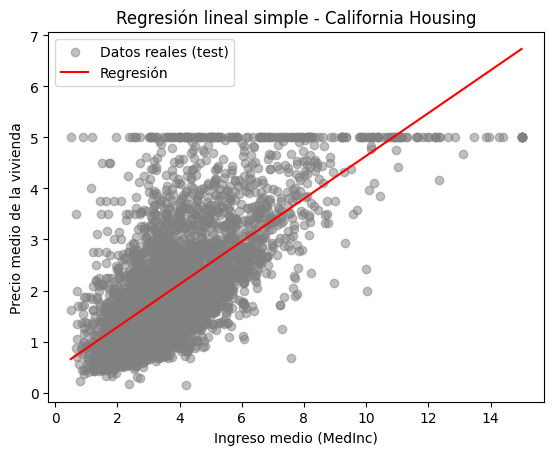

Pendiente: 0.42
Intersección: 0.44


In [ ]:
# Cargar dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Usamos una sola variable para regresión lineal simple (por ejemplo, "MedInc": ingreso medio)
x = X[:, feature_names.index('MedInc')].reshape(-1, 1)

# Dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

# Predicciones
x_pred = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = modelo.predict(x_pred)

# Visualización
plt.scatter(x_test, y_test, color='gray', alpha=0.5, label='Datos reales (test)')
plt.plot(x_pred, y_pred, color='red', label='Regresión')
plt.xlabel('Ingreso medio (MedInc)')
plt.ylabel('Precio medio de la vivienda')
plt.title('Regresión lineal simple - California Housing')
plt.legend()
plt.show()

# Coeficientes
print(f"Pendiente: {modelo.coef_[0]:.2f}")
print(f"Intersección: {modelo.intercept_:.2f}")


## Regresión lineal multiple con el mismo dataset

In [ ]:
# Cargar datos
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Mostrar coeficientes
print("Coeficientes del modelo:")
for name, coef in zip(feature_names, modelo.coef_):
    print(f"{name}: {coef:.4f}")
print(f"Intersección: {modelo.intercept_:.4f}")


Coeficientes del modelo:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337
Intersección: -37.0233


### QQ plot

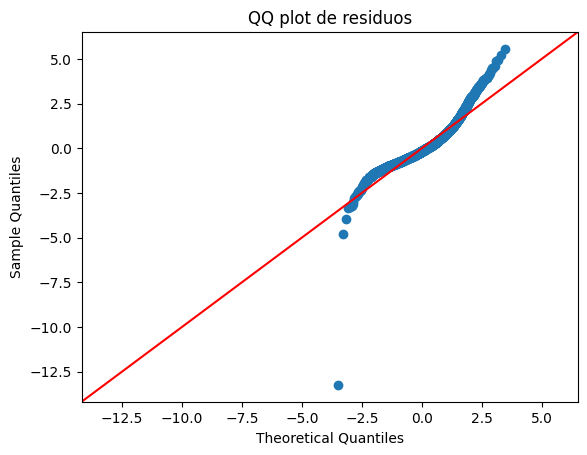

In [ ]:
# Residuos
residuos = y_test - y_pred

# QQ plot
sm.qqplot(residuos, line='45', fit=True)
plt.title("QQ plot de residuos")
plt.show()


### Gráfico de residuos

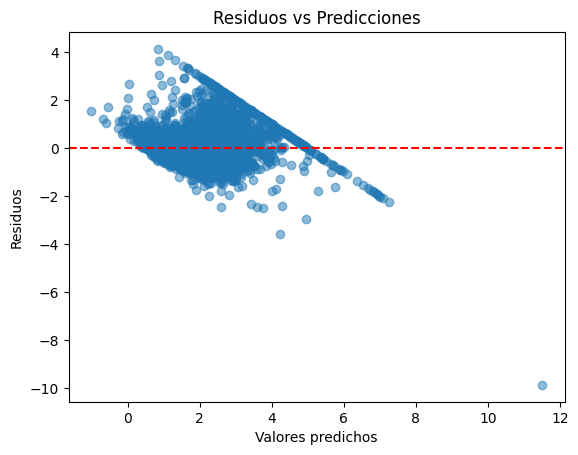

In [ ]:
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()